<a href="https://colab.research.google.com/github/gorzanskik-ai/statistics/blob/main/03_data_types_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Statistics/data/yellow_tripdata_2021-05.parquet"

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
taxi = pd.read_parquet(path, engine='auto', columns=['trip_distance'], storage_options=None, use_nullable_dtypes=False)
taxi.query('trip_distance > 0 and trip_distance <= 50', inplace=True)

In [4]:
bins = 50
interval_width = (taxi['trip_distance'].max() - taxi['trip_distance'].min()) / bins
print(interval_width)

0.9992


In [5]:
abs_frequency, intervals = np.histogram(taxi['trip_distance'], bins=50)
print(abs_frequency, intervals) #liczby przedziałów na interwał, punkty podziału

[539394 832183 428010 213627 111637  64987  44677  34458  30569  27841
  22647  16226  11451   8879   7852   7860   9778  15401  15655  10533
   6926   4223   2270   1266    843    737    691    522    381    268
    210    151    153    107    125    117    112     87     91     63
     66     59     45     37     43     38     30     33     33     30] [1.00000e-02 1.00920e+00 2.00840e+00 3.00760e+00 4.00680e+00 5.00600e+00
 6.00520e+00 7.00440e+00 8.00360e+00 9.00280e+00 1.00020e+01 1.10012e+01
 1.20004e+01 1.29996e+01 1.39988e+01 1.49980e+01 1.59972e+01 1.69964e+01
 1.79956e+01 1.89948e+01 1.99940e+01 2.09932e+01 2.19924e+01 2.29916e+01
 2.39908e+01 2.49900e+01 2.59892e+01 2.69884e+01 2.79876e+01 2.89868e+01
 2.99860e+01 3.09852e+01 3.19844e+01 3.29836e+01 3.39828e+01 3.49820e+01
 3.59812e+01 3.69804e+01 3.79796e+01 3.89788e+01 3.99780e+01 4.09772e+01
 4.19764e+01 4.29756e+01 4.39748e+01 4.49740e+01 4.59732e+01 4.69724e+01
 4.79716e+01 4.89708e+01 4.99700e+01]


<Axes: ylabel='Frequency'>

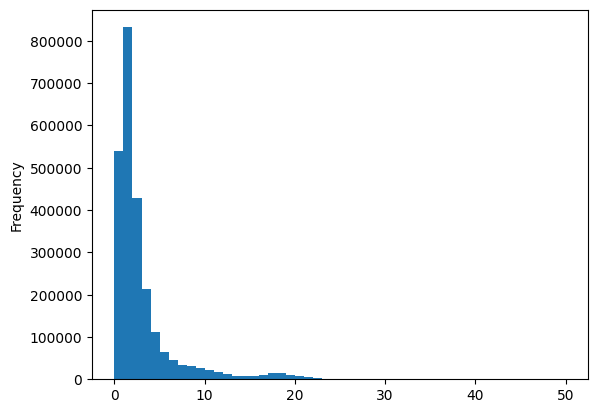

In [7]:
taxi['trip_distance'].plot.hist(bins=50)

In [8]:
interval_range = pd.interval_range(start=0, freq=1, end=50, closed='right')
# assign each row to a bin
taxi['bin'] = pd.cut(taxi['trip_distance'], bins=interval_range)
print(taxi.head())
# calculate counts for each bin
freq_table = pd.crosstab(index=taxi["bin"], columns="trip_distance")
print(freq_table)

   trip_distance     bin
0           0.70  (0, 1]
1           1.40  (1, 2]
2           5.70  (5, 6]
3           3.04  (3, 4]
4           4.04  (4, 5]
col_0     trip_distance
bin                    
(0, 1]           539394
(1, 2]           832183
(2, 3]           428010
(3, 4]           213627
(4, 5]           111637
(5, 6]            64987
(6, 7]            44677
(7, 8]            34458
(8, 9]            30569
(9, 10]           27841
(10, 11]          22647
(11, 12]          16226
(12, 13]          11726
(13, 14]           8845
(14, 15]           7817
(15, 16]           7916
(16, 17]           9926
(17, 18]          15529
(18, 19]          15535
(19, 20]          10360
(20, 21]           6866
(21, 22]           4118
(22, 23]           2252
(23, 24]           1228
(24, 25]            832
(25, 26]            752
(26, 27]            679
(27, 28]            521
(28, 29]            376
(29, 30]            264
(30, 31]            209
(31, 32]            152
(32, 33]            150
(33, 34]  

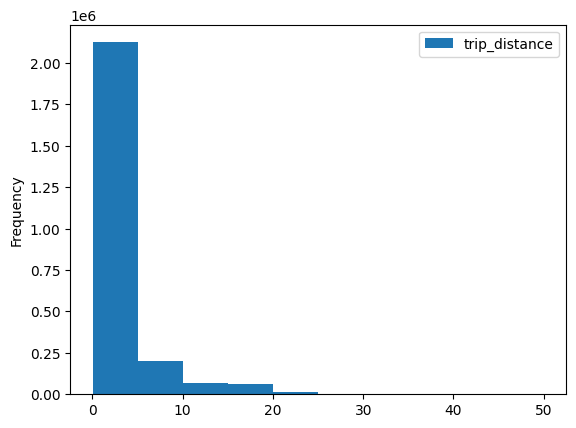

In [9]:
taxi.plot.hist(column="trip_distance", bins=10)
plt.show()